In [99]:
import cv2
from skimage import io
from skimage.color import rgb2gray
from TextSegmentation.text_segmentation import segmentImage
from Image2Text.eval import evaluate

image_path = "../data/sample/a00-000u.png"
image = cv2.imread(image_path)

segments = segmentImage(image)
# segments

7
14
23
29
36
46
52


In [100]:
# segments, outputs = evaluate(segments)
segments[0]
# segments

array([[251, 251, 251, 251, 251, 254, 242, 237, 167,  73,  55,  65,  51,
        143, 234, 242, 243, 255, 244, 251, 254, 251, 251, 251, 251, 251],
       [252, 251, 251, 251, 251, 251, 244, 230, 115,  70,  56,  62,  61,
         93, 235, 241, 244, 251, 251, 254, 255, 251, 251, 251, 251, 251],
       [251, 251, 251, 251, 250, 247, 243, 221, 103,  66,  53,  56,  60,
         74, 193, 238, 246, 250, 252, 249, 245, 251, 251, 251, 251, 251],
       [251, 251, 251, 250, 250, 248, 247, 214,  91,  65,  54,  54,  63,
         63, 141, 237, 249, 248, 255, 250, 245, 251, 251, 251, 251, 251],
       [251, 251, 250, 250, 250, 248, 248, 208,  81,  64,  55,  52,  63,
         63,  99, 229, 249, 243, 254, 253, 252, 251, 251, 251, 251, 251],
       [250, 250, 250, 250, 249, 245, 244, 202,  74,  59,  53,  48,  57,
         59,  70, 204, 247, 242, 247, 251, 252, 250, 250, 250, 250, 250],
       [250, 250, 250, 249, 249, 246, 243, 206,  80,  59,  55,  52,  53,
         53,  56, 162, 241, 250, 246, 250, 24

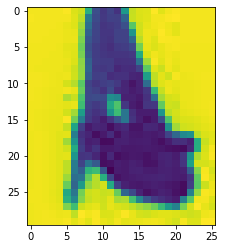

In [103]:
plt.imshow(segments[0])

In [104]:
image1 = io.imread("../data/words/a01-000u-00-00.png")
image1

array([[249, 249, 246, ..., 251, 251, 251],
       [250, 249, 231, ..., 251, 251, 251],
       [245, 241, 216, ..., 251, 251, 251],
       ...,
       [123, 202, 234, ...,  94, 194, 233],
       [142, 218, 240, ..., 158, 230, 241],
       [163, 233, 241, ..., 221, 237, 242]], dtype=uint8)

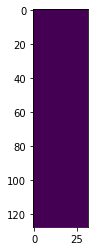

In [8]:
import matplotlib.pyplot as plt

segments[0].cpu().numpy()
plt.imshow(segments[0].cpu().numpy().squeeze(0))

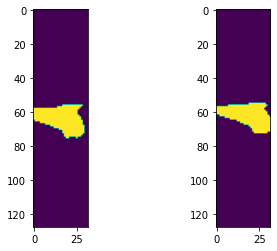

In [106]:
from torchvision import transforms
from Image2Text.preprocessing import Rescale, GreyscaleToBlackAndWhite, TransposeImage, GaussianFiltering, AverageFiltering, MedianPool2d, NumpyToTensor
from Image2Text import config
import numpy as np
import torch

transform = transforms.Compose([
        TransposeImage(),
        Rescale((config.IMAGE_H, config.IMAGE_W)),
        transforms.Normalize(mean=(192,), std=(81,)),
    #     AverageFiltering(channels=1, kernel_size=5),
        NumpyToTensor(),
        GaussianFiltering(channels=1, kernel_size=5, sigma=1),
        GreyscaleToBlackAndWhite(),
    #     MedianPool2d(kernel_size=5, same=True),
])

one = transform(torch.tensor(segments[0], dtype=torch.float).unsqueeze(0))
two = transform(torch.tensor(io.imread("../data/words/a01-000u-00-00.png"), dtype=torch.float).unsqueeze(0))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(one.numpy()[0])
ax[1].imshow(two.numpy()[0])

In [91]:
segments[0]

array([[251, 251, 251, 251, 251, 254, 242, 237, 167,  73,  55,  65,  51,
        143, 234, 242, 243, 255, 244, 251, 254, 251, 251, 251, 251, 251],
       [252, 251, 251, 251, 251, 251, 244, 230, 115,  70,  56,  62,  61,
         93, 235, 241, 244, 251, 251, 254, 255, 251, 251, 251, 251, 251],
       [251, 251, 251, 251, 250, 247, 243, 221, 103,  66,  53,  56,  60,
         74, 193, 238, 246, 250, 252, 249, 245, 251, 251, 251, 251, 251],
       [251, 251, 251, 250, 250, 248, 247, 214,  91,  65,  54,  54,  63,
         63, 141, 237, 249, 248, 255, 250, 245, 251, 251, 251, 251, 251],
       [251, 251, 250, 250, 250, 248, 248, 208,  81,  64,  55,  52,  63,
         63,  99, 229, 249, 243, 254, 253, 252, 251, 251, 251, 251, 251],
       [250, 250, 250, 250, 249, 245, 244, 202,  74,  59,  53,  48,  57,
         59,  70, 204, 247, 242, 247, 251, 252, 250, 250, 250, 250, 250],
       [250, 250, 250, 249, 249, 246, 243, 206,  80,  59,  55,  52,  53,
         53,  56, 162, 241, 250, 246, 250, 24

In [92]:
one.numpy()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

7
14
23
29
36
46
52
53


['As~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'NO~~~~~~~~~~~~~~~~~v~~~~~~~E~~~~',
 'to~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'st~~~~~~~~~~~~o~~~~~~p~~~~~~~~~~',
 'Mr~~~~~~~~~~~~~~~~~~~~~.~~~~~~~~',
 'Ga~~~~~~i~~t~~~~~k~~~e~~l~~~l~~~',
 'fr~~~~~~~~~~~o~~~~mm~~~~~~~~~~~~',
 'no~~~~m~~~ii~~~n~~~~a~~~~t~~ii~~',
 'mm~~~~~~~~~~~~~~g~~~~~~~~~~~~~~~',
 'an~~~~~~~~~~~~~~~~y~~~~~~~~~~~~~',
 'mo~~~~~~~~~~~~~~m~~~~~~~~ee~~~~~',
 'La~~~~~~~~~b~~~~o~~uu~~~~~~rr~~~',
 'li~~~~~~~~~~~~f~~~~e~~~~~~~~~~~~',
 'Pe~~~~~~~~~~~~~e~~~r~~~s~~~~~~~~',
 'no~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'to~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'be~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'ma~~~~~~~~~~~~~~~~~d~~~~~e~~~~~~',
 'at~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'at~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'me~~~~~~~e~~~tt~~ii~n~~~~~g~~~~~',
 'of~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'La~~~~~~~b~~~~~o~~u~~~~~~~~~~r~~',
 'MN~~~~~~~~~~~~PP~~~~~~s~~~~~~~~~',
 'to~~~~m~~~~~o~~~r~~n~~oo~ww~~~~~',
 'Mr~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~',
 'Mi~~~~~~~cc~~h~~~~~~a~~~e~~~~l~~',
 

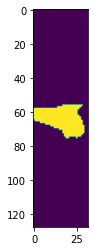

In [127]:
from Image2Text.model import Image2TextNet
from Image2Text.engine import one_sample

v = 36

image_path = "../data/sample/a00-000u.png"
image = cv2.imread(image_path)
segments = segmentImage(image)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(len(segments))

model = Image2TextNet()
model.load_state_dict(torch.load("Image2Text/weights/model_checkpoint_%s.pth" % v))
model.to(device)
model.eval()

transform = transforms.Compose([
    TransposeImage(),
    Rescale((config.IMAGE_H, config.IMAGE_W)),
    transforms.Normalize(mean=(192,), std=(81,)),
#     AverageFiltering(channels=1, kernel_size=5),
    NumpyToTensor(),
    GaussianFiltering(channels=1, kernel_size=5, sigma=1),
    GreyscaleToBlackAndWhite(),
#     MedianPool2d(kernel_size=5, same=True),
])

# segments = [transform(torch.tensor(segment, dtype=torch.float).unsqueeze(0)) for segment in segments]
# plt.imshow(one[0][0])
segments = [transform(torch.tensor(segment, dtype=torch.float).unsqueeze(0)) for segment in segments]
plt.imshow(segments[0].cpu()[0])
output = [one_sample(segment, model, device) for segment in segments]
output